In [59]:
import json;
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib;
import datetime as dt
import time
import numpy as np

from pandas.io.json import json_normalize

matplotlib.style.use('ggplot');
%matplotlib inline

In [60]:
dfIn = pd.read_csv('itemhistory.csv', dtype={'Craft':str, 'DateTime':dt.datetime, 'DefIndex':np.float64, 'Name':str,
                                            'PriceIndex':str, 'QualInt':np.int64, 'Trade':str, 'currency':str,
                                            'timestamp':np.float64, 'value':np.float64, 'value_high':np.float64})
dfIn['DateTime'] = pd.to_datetime(dfIn['DateTime'])
dfIn = dfIn.set_index(['Name', 'DefIndex', 'QualInt', 'Trade', 'Craft', 'PriceIndex', 'timestamp'])
dfIn.sort_index(inplace = True)

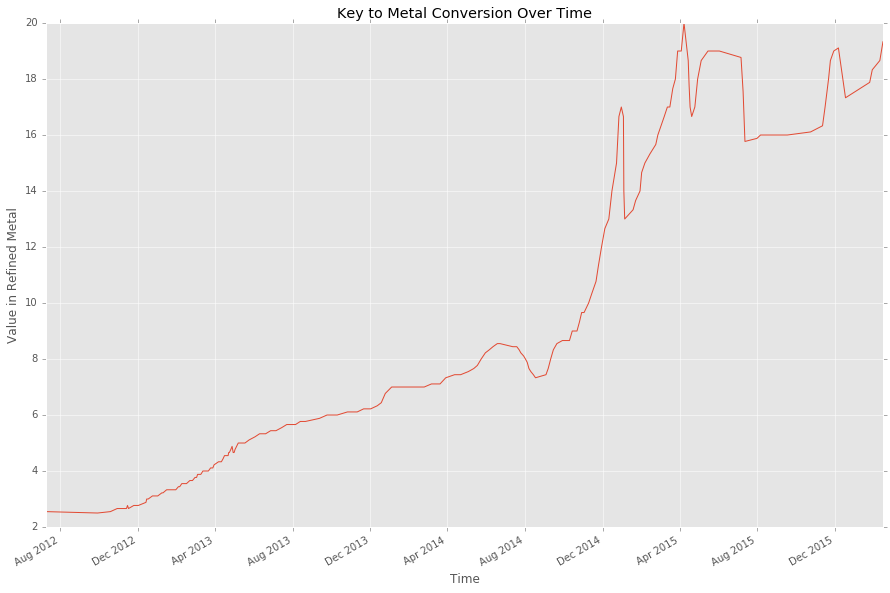

In [69]:
dfIn.reset_index(inplace = True)
dfKey = dfIn[dfIn['Name'] == 'Mann Co. Supply Crate Key'].head(1000000000000)
dfKey = dfKey.sort_values('DateTime')
ax = dfKey.plot(kind='line', x='DateTime', y='value', title='Key to Metal Conversion Over Time', figsize=(15, 10))
ax.legend_.remove()

ax.set_xlabel('Time')
ax.set_ylabel('Value in Refined Metal')
#ax.axhline(y=2.50) <-- Line representing key dollar amt

In [68]:
print("High: %0.2f\nLow: %0.2f" % (dfKey['value'].max(), dfKey['value'].min()))

High: 20.00
Low: 2.50
